In [1]:
# Install (some of the) required packages

!pip install ogb
!pip install POT
!pip install prettytable
!pip install tqdm

In [2]:
# Import required modules

import ogb; print('ogb version {}'.format(ogb.__version__)) # make sure the version is =>1.1.1.
from ogb.graphproppred import PygGraphPropPredDataset
from WEGL.WEGL import WEGL

ogb version 1.1.1


In [3]:
# Set the random seed

random_seed = 55

In [4]:
# Load the dataset

dataset = PygGraphPropPredDataset(name="ogbg-molhiv")

print('# of graphs = {0}\n# of classes = {1}\n# of node features = {2}\n# of edge features = {3}'.\
         format(len(dataset), dataset.num_classes, dataset.num_node_features, dataset.num_edge_features))

if isinstance(dataset, PygGraphPropPredDataset): # OGB datasets
    print('# of tasks = {}'.format(dataset.num_tasks))

# of graphs = 41127
# of classes = 2
# of node features = 9
# of edge features = 3
# of tasks = 1


In [5]:
# Specify the parameters

# num_hidden_layers = range(3, 9)
num_hidden_layers = [4]

# node_embedding_sizes = [100, 300, 500]
node_embedding_sizes = [300]

# final_node_embeddings = ['concat', 'avg', 'final']
final_node_embeddings = ['final']

num_pca_components = 20
num_experiments = 10
classifiers = ['RF']
device = 'cpu'

****************************************************************************************************
# diffusion layers = 4, node embedding size = 300, node embedding mode: final

Now diffusing the train data ...



Now diffusing the valid data ...



Now diffusing the test data ...



Now running PCA ...


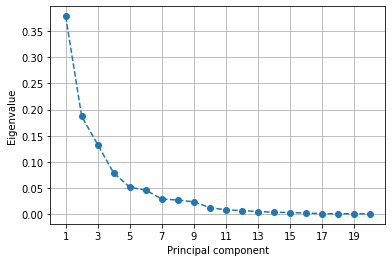

Now running k-means for deriving the template ...

Now deriving the final graph embeddings for the train data ...



Now deriving the final graph embeddings for the valid data ...



Now deriving the final graph embeddings for the test data ...



Now running the classifiers ...
experiment 1/10 for RF completed ...
experiment 2/10 for RF completed ...
experiment 3/10 for RF completed ...
experiment 4/10 for RF completed ...
experiment 5/10 for RF completed ...
experiment 6/10 for RF completed ...
experiment 7/10 for RF completed ...
experiment 8/10 for RF completed ...
experiment 9/10 for RF completed ...
experiment 10/10 for RF completed ...


Final ROC-AUC(%) results for the ogbg-molhiv dataset with 'final' node embedding and one-hot 13-dim edge embedding
+------------+--------------------+---------------------+-------------------+------------------+------------------+
| Classifier | # Diffusion Layers | Node Embedding Size |       Train.      |       Val.       |       Test       |
+------------+--------------------+---------------------+-------------------+------------------+------------------+
|     RF     |         4          |         300         | 100.00 $\pm$ 0.00 | 80.70 $\pm$ 2.03 | 77.92 $\pm$ 1.30 |
+------------+-

In [6]:
# Run the algorithm

for final_node_embedding in final_node_embeddings:
    WEGL(dataset=dataset,
         num_hidden_layers=num_hidden_layers,
         node_embedding_sizes=node_embedding_sizes,
         final_node_embedding=final_node_embedding,
         num_pca_components=num_pca_components,
         num_experiments=num_experiments,
         classifiers=classifiers,
         random_seed=random_seed,
         device=device)